In [48]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [49]:
current_dir = os.getcwd()
data = pd.read_csv(current_dir+'//haberman.csv')
data.columns=["Age","Operation_year","Axil_nodes","Surv_status"]
data.head()

,Age,Operation_year,Axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [50]:
print('The number of rows are ',data.shape[0])
print('The number of features are ',data.shape[1]-1)

The number of rows are  305
The number of features are  3


In [51]:
print('There are %d categories in survival status'%len(data['Surv_status'].unique()))
print(data['Surv_status'].unique())
print('1 means survived and 2 means died')

There are 2 categories in survival status
[1 2]
1 means survived and 2 means died


In [52]:
data['Surv_status'].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

**Number of elements in survived is 224 and died is 81**

In [53]:
np.round(data.describe(),3)

,Age,Operation_year,Axil_nodes,Surv_status
count,305.000,305.000,305.000,305.000
mean,52.531,62.849,4.036,1.266
std,10.744,3.254,7.199,0.442
min,30.000,58.000,0.000,1.000
25%,44.000,60.000,0.000,1.000
50%,52.000,63.000,1.000,1.000
75%,61.000,66.000,4.000,2.000
max,83.000,69.000,52.000,2.000


1. Total number of data points are 305 with 3 features and 1 label 
2. 75% of the dataset contains the axil nodes in the range of 0-4
3. 50% of the sample has age 52 years and 75% of sample has age below 61 years

In [54]:
data.isnull().any()

Age               False
Operation_year    False
Axil_nodes        False
Surv_status       False
dtype: bool

**No entries is null**

## Univariate Analysis

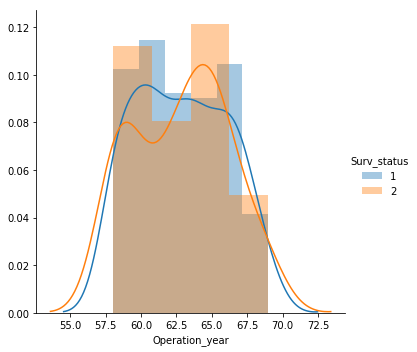

In [55]:
sns.FacetGrid(data,hue = 'Surv_status',size=5).map(sns.distplot,"Operation_year").add_legend();
plt.show();

1. Both the categories are overlapping hence operation year is alone not categorizing the survival status